# Python Numeric Data Analysis - Pandas

* For the times when you have Structured data, CSV, spreadsheets, R dataframes, SQL tables.

* Like numpy tables but more sophisticated labelling of rows and columns.  Good at dealing with missing and messy data. Heterogeneous data types. Time series data.

* Clean up and explore data, prepare it for analysis.

* Analyse or pass on to other systems (Scikit-learn, tensorflow, etc)

In [1]:
# The usual suspects
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]

# And pandas
import pandas as pd


## Understanding the Pandas classes

### Series

Like a numpy array but with index labels:

In [2]:
s = pd.Series([1.1, 2.2, 3.3, 4.4])
s

0    1.1
1    2.2
2    3.3
3    4.4
dtype: float64

In [3]:
s[1:3]

1    2.2
2    3.3
dtype: float64

In [4]:
s = pd.Series([1.1, 2.2, 3.3, 4.4], index=["alice", "bob", "charles", "diana"])
s

alice      1.1
bob        2.2
charles    3.3
diana      4.4
dtype: float64

In [5]:
s['charles']

3.3

In [6]:
s['alice':'charles':2]

alice      1.1
charles    3.3
dtype: float64

In [7]:
s.index

Index(['alice', 'bob', 'charles', 'diana'], dtype='object')

In [8]:
s.values

array([1.1, 2.2, 3.3, 4.4])

We can construct a Series from, e.g., a Python dict:

In [9]:
populations = pd.Series({
    "London":    8173941,
    "Birmingham":1085810,
    "Glasgow":    590507,
    "Liverpool":  552267, 
    "Bristol":    535907
})
populations

London        8173941
Birmingham    1085810
Glasgow        590507
Liverpool      552267
Bristol        535907
dtype: int64

And we can use it a lot like a Python dict...

In [10]:
for k in populations.keys():
    print(k)

London
Birmingham
Glasgow
Liverpool
Bristol


In [11]:
"Bristol" in populations

True

but with ordering, and the power of numpy arrays:

In [12]:
populations / 1_000_000

London        8.173941
Birmingham    1.085810
Glasgow       0.590507
Liverpool     0.552267
Bristol       0.535907
dtype: float64

In [13]:
(populations / 1_000_000).std()

3.354226049808032

In [14]:
populations.idxmax()

'London'

In [15]:
populations.sort_index()

Birmingham    1085810
Bristol        535907
Glasgow        590507
Liverpool      552267
London        8173941
dtype: int64

In [16]:
populations.sort_values()

Bristol        535907
Liverpool      552267
Glasgow        590507
Birmingham    1085810
London        8173941
dtype: int64

In [17]:
populations.rank(ascending=False)

London        1.0
Birmingham    2.0
Glasgow       3.0
Liverpool     4.0
Bristol       5.0
dtype: float64

In [18]:
populations[populations > 1_000_000]

London        8173941
Birmingham    1085810
dtype: int64

c.f.
`SELECT index, value FROM populations WHERE value > 1000000;`

Here's a different dataset: the percentage of men in the population:

In [19]:
male_percent = pd.Series({
    "London": 49.12,
    "Birmingham": 49.42,
    "Leeds": 49.43,
    "Glasgow": 47.73,
    "Bristol": 49.59,
})
male_percent

London        49.12
Birmingham    49.42
Leeds         49.43
Glasgow       47.73
Bristol       49.59
dtype: float64

Percentage of women:

In [20]:
100 - male_percent

London        50.88
Birmingham    50.58
Leeds         50.57
Glasgow       52.27
Bristol       50.41
dtype: float64

In [21]:
female_pops = populations * (100 - male_percent) / 100.0
female_pops

Birmingham    5.492027e+05
Bristol       2.701507e+05
Glasgow       3.086580e+05
Leeds                  NaN
Liverpool              NaN
London        4.158901e+06
dtype: float64

Note that a few clever things happened there!

In [22]:
female_pops[ female_pops.notnull() ].astype(int)

Birmingham     549202
Bristol        270150
Glasgow        308658
London        4158901
dtype: int64

If we had reason to believe there were *no* women in the cities for which we had incomplete data:

In [25]:
female_pops.fillna(0).astype(int)

Birmingham     549202
Bristol        270150
Glasgow        308658
Leeds               0
Liverpool           0
London        4158901
dtype: int64

All pretty clever, but that's just the **Series**.  There's a more powerful class...

---

### DataFrames

![Dataframe](dataframe.png)

## A quick look at a DataFrame

In [26]:
df = pd.read_excel("landmarks.xls", sheet_name="landmarks")
df

,frame,timestamp,confidence,x_0,x_1,x_2,x_3,y_0,y_1,y_2,y_3
0,1,0.000000,0.943911,175.123,174.967,177.247,181.257,194.562,219.637,244.535,268.530
1,2,0.033333,0.948682,175.706,174.973,176.838,180.568,191.394,215.806,240.044,263.600
2,3,0.066667,0.942228,175.875,174.630,176.100,179.535,188.718,212.172,235.489,258.435
3,4,0.100000,0.943133,175.864,174.412,175.687,178.805,186.152,209.211,232.173,254.872
4,5,0.133333,0.958692,175.636,173.655,174.511,177.374,183.975,206.413,228.901,251.368
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,333.167000,0.963013,149.210,147.123,148.042,150.890,196.473,216.266,236.679,257.217
9996,9997,333.200000,0.962133,149.315,147.237,148.186,151.064,196.105,215.964,236.411,256.969
9997,9998,333.233000,0.959576,149.493,147.375,148.266,151.117,196.020,215.868,236.307,256.854
9998,9999,333.267000,0.950995,149.557,147.448,148.348,151.202,196.076,215.914,236.346,256.903


In [27]:
df.head(7)

,frame,timestamp,confidence,x_0,x_1,x_2,x_3,y_0,y_1,y_2,y_3
0,1,0.000000,0.943911,175.123,174.967,177.247,181.257,194.562,219.637,244.535,268.530
1,2,0.033333,0.948682,175.706,174.973,176.838,180.568,191.394,215.806,240.044,263.600
2,3,0.066667,0.942228,175.875,174.630,176.100,179.535,188.718,212.172,235.489,258.435
3,4,0.100000,0.943133,175.864,174.412,175.687,178.805,186.152,209.211,232.173,254.872
4,5,0.133333,0.958692,175.636,173.655,174.511,177.374,183.975,206.413,228.901,251.368
5,6,0.166667,0.942964,175.262,173.287,173.993,176.726,183.031,205.265,227.443,249.519
6,7,0.200000,0.956234,175.319,173.073,173.636,176.419,182.038,204.036,225.953,247.820


In [28]:
df.columns

Index(['frame', 'timestamp', 'confidence', 'x_0', 'x_1', 'x_2', 'x_3', 'y_0',
       'y_1', 'y_2', 'y_3'],
      dtype='object')

In [29]:
df.index

RangeIndex(start=0, stop=10000, step=1)

### Columns come first

It's *important* to appreciate that the first axis in a dataframe selects *columns*, not *rows*.

In [30]:
df['confidence']

0       0.943911
1       0.948682
2       0.942228
3       0.943133
4       0.958692
          ...   
9995    0.963013
9996    0.962133
9997    0.959576
9998    0.950995
9999    0.955158
Name: confidence, Length: 10000, dtype: float64

In [31]:
type(df['confidence'])

pandas.core.series.Series

In [32]:
df['confidence'].values.mean()

0.9560966827999997

In [33]:
df['confidence'].mean()

0.9560966827999997

In [34]:
np.mean(df['confidence'])

0.9560966827999997

In [35]:
df['confidence'][23:26]

23    0.948399
24    0.948309
25    0.951748
Name: confidence, dtype: float64

**Important:** Note that this output is still a Series, so you need to respect its indexing:

In [36]:
df['confidence'][23:26][23]

0.948399

If the column name is suitable, you can refer to it as an attribute:

In [37]:
df.confidence.max()

0.983578

In [38]:
df[ ['frame', 'timestamp', 'confidence'] ].head()

,frame,timestamp,confidence
0,1,0.000000,0.943911
1,2,0.033333,0.948682
2,3,0.066667,0.942228
3,4,0.100000,0.943133
4,5,0.133333,0.958692


In [39]:
df.describe()

,frame,timestamp,confidence,x_0,x_1,x_2,x_3,y_0,y_1,y_2,y_3
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,166.650000,0.956097,163.992519,162.249467,163.247837,166.069199,198.629269,220.726456,242.901419,264.685261
std,2886.89568,96.229856,0.032989,9.413214,8.610538,8.002127,7.723163,9.318857,9.275674,9.389565,9.684043
min,1.00000,0.000000,0.280670,111.719000,112.460000,116.196000,121.583000,166.733000,189.699000,213.067000,237.886000
25%,2500.75000,83.324975,0.953182,157.428250,156.299750,158.520500,162.066500,191.318750,213.614500,236.168000,258.220250
50%,5000.50000,166.650000,0.961579,165.142000,163.539500,164.310000,166.214000,199.267000,221.184500,242.860500,264.100000
75%,7500.25000,249.975250,0.967625,170.396500,167.744000,167.564500,169.916000,204.095500,226.220500,248.634250,270.582750
max,10000.00000,333.300000,0.983578,200.409000,195.816000,195.431000,200.711000,249.504000,273.746000,297.924000,322.624000


We can extract sections of the dataframe using slices:

In [40]:
df[400:404]

,frame,timestamp,confidence,x_0,x_1,x_2,x_3,y_0,y_1,y_2,y_3
400,401,13.3333,0.952584,174.200,174.037,176.359,180.253,193.556,216.756,239.607,261.946
401,402,13.3667,0.958879,174.402,174.130,176.315,180.038,193.419,216.361,238.946,260.997
402,403,13.4000,0.955928,174.870,174.407,176.461,180.156,193.527,216.422,239.014,261.074
403,404,13.4333,0.933037,174.401,174.416,176.840,180.852,194.753,217.871,240.580,262.837


Note that _the result is also a DataFrame_.

We can also use boolean indexes in Pandas structures:

In [41]:
df.confidence > 0.96

0       False
1       False
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997    False
9998    False
9999    False
Name: confidence, Length: 10000, dtype: bool

In [42]:
df[df.confidence > 0.96]

,frame,timestamp,confidence,x_0,x_1,x_2,x_3,y_0,y_1,y_2,y_3
8,9,0.266667,0.965172,174.979,172.332,172.531,174.917,180.344,201.878,223.185,244.444
85,86,2.833330,0.962823,167.369,165.764,166.631,169.606,189.345,211.491,232.803,253.682
87,88,2.900000,0.960150,167.593,165.087,165.639,169.138,190.004,212.028,233.302,254.416
120,121,4.000000,0.960443,162.597,160.605,161.953,166.061,204.895,224.939,244.358,263.774
123,124,4.100000,0.962754,163.827,162.355,163.914,167.920,201.858,222.513,242.420,262.069
...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,333.067000,0.969392,148.694,146.713,147.675,150.555,196.321,216.350,236.958,257.586
9993,9994,333.100000,0.967465,148.774,146.751,147.758,150.707,196.816,216.784,237.388,258.051
9994,9995,333.133000,0.966070,149.116,147.048,147.977,150.849,196.843,216.680,237.121,257.675
9995,9996,333.167000,0.963013,149.210,147.123,148.042,150.890,196.473,216.266,236.679,257.217


---

## A potential source of confusion

So the dataframe is indexed first by the columns:

    df['confidence']
    
If you treat it like a Python dict, the keys are the column names:

In [43]:
for i in df.keys():
    print(i)

frame
timestamp
confidence
x_0
x_1
x_2
x_3
y_0
y_1
y_2
y_3


Simple indexing into a dataframe will give you a column.

But slices, boolean indexes etc, as we've seen above, give you a dataframe.  

It's not unusual for different types of indexes to give you different things -- slicing a list in Python gives you a list, simple indexing gives you an entry from the list.

If you're used to Numpy arrays or Pandas Series, note that you can't normally do:

    df[0]
    
with a Dataframe... unless there happens to be a *column* named '0'.

This will never give you a row.

If you do want to get a *row* by number, there's an attribute for that:

In [44]:
df.iloc[2]  # returns a Series for the row

frame           3.000000
timestamp       0.066667
confidence      0.942228
x_0           175.875000
x_1           174.630000
x_2           176.100000
x_3           179.535000
y_0           188.718000
y_1           212.172000
y_2           235.489000
y_3           258.435000
Name: 2, dtype: float64

In [45]:
df.iloc[2]['timestamp']

0.0666667

**Question:** What will this do?

In [46]:
for p in df[:5]:
    print(p)

frame
timestamp
confidence
x_0
x_1
x_2
x_3
y_0
y_1
y_2
y_3


OK, are we happy?

---

# Some sample data - the Lab Weather Station

![station](https://www.cl.cam.ac.uk/research/dtg/weather/images/wgb-view.jpg)

The lab has a weather station at https://www.cl.cam.ac.uk/research/dtg/weather/.

![dials](https://www.cl.cam.ac.uk/research/dtg/weather/images/current-dials.png?)

The data is collated into various downloadable files:

In [47]:
df = pd.read_csv('https://www.cl.cam.ac.uk/research/dtg/weather/weather-raw.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,1995-06-30 15:00:00,295.0,43.0,156.0,1013.0,14.0,225.0,1044,0,14.0
1,1995-06-30 15:30:00,305.0,36.0,140.0,1013.0,13.0,315.0,50,0,13.0
2,1995-06-30 16:00:00,311.0,41.0,163.0,1013.0,12.0,315.0,51,0,12.0
3,1995-06-30 16:30:00,322.0,43.0,181.0,1013.0,2.0,315.0,50,0,2.0
4,1995-06-30 17:00:00,327.0,41.0,178.0,1013.0,8.0,225.0,51,0,8.0
...,...,...,...,...,...,...,...,...,...,...
422955,2019-12-05 00:00:00,-32.0,100.0,-32.0,1020.0,5.0,135.0,0,0,40.0
422956,2019-12-05 00:30:00,-28.0,96.0,-33.0,1020.0,18.0,180.0,0,0,60.0
422957,2019-12-05 01:00:00,-12.0,100.0,-12.0,1020.0,18.0,180.0,0,0,60.0
422958,2019-12-05 01:30:00,-8.0,100.0,-8.0,1020.0,35.0,180.0,0,0,80.0


Note that if the columns don't have names as headers, they'll be given numbers:

In [48]:
df[0]

0         1995-06-30 15:00:00
1         1995-06-30 15:30:00
2         1995-06-30 16:00:00
3         1995-06-30 16:30:00
4         1995-06-30 17:00:00
                 ...         
422955    2019-12-05 00:00:00
422956    2019-12-05 00:30:00
422957    2019-12-05 01:00:00
422958    2019-12-05 01:30:00
422959    2019-12-05 02:00:00
Name: 0, Length: 422960, dtype: object

Let's give the columns names, and parse the timestamps:

In [49]:
df = pd.read_csv(
    'https://www.cl.cam.ac.uk/research/dtg/weather/weather-raw.csv', 
    names=[
        'timestamp', 'temp_dc','humidity', 'dewpoint_dc', 'pressure_mbar', 
        'mean_wind_speed_dk', 'ave_wind_bearing', 'sunshine_ch', 'rainfall_um', 'max_wind_dk'
    ],
    parse_dates=['timestamp']
)

df.head(10)

,timestamp,temp_dc,humidity,dewpoint_dc,pressure_mbar,mean_wind_speed_dk,ave_wind_bearing,sunshine_ch,rainfall_um,max_wind_dk
0,1995-06-30 15:00:00,295.0,43.0,156.0,1013.0,14.0,225.0,1044,0,14.0
1,1995-06-30 15:30:00,305.0,36.0,140.0,1013.0,13.0,315.0,50,0,13.0
2,1995-06-30 16:00:00,311.0,41.0,163.0,1013.0,12.0,315.0,51,0,12.0
3,1995-06-30 16:30:00,322.0,43.0,181.0,1013.0,2.0,315.0,50,0,2.0
4,1995-06-30 17:00:00,327.0,41.0,178.0,1013.0,8.0,225.0,51,0,8.0
5,1995-06-30 17:30:00,322.0,43.0,181.0,1012.0,17.0,0.0,51,0,17.0
6,1995-06-30 18:00:00,316.0,44.0,177.0,1013.0,34.0,45.0,50,0,34.0
7,1995-06-30 18:30:00,305.0,46.0,175.0,1013.0,28.0,45.0,51,0,28.0
8,1995-06-30 19:00:00,247.0,60.0,163.0,1014.0,80.0,0.0,51,0,80.0
9,1995-06-30 19:30:00,204.0,64.0,133.0,1015.0,83.0,0.0,23,0,83.0


`read_csv()` is a very powerful function.

In [50]:
pd.read_csv?

See also `pd.read_json()`, `pd.read_xml()`, `pd.read_hdf5()` etc, and the related `to_` output functions.

In [53]:
basics = df[['timestamp', 'temp_dc', 'rainfall_um']]
print(
    basics[0:10].to_csv(sep='|')
)

|timestamp|temp_dc|rainfall_um
0|1995-06-30 15:00:00|295.0|0
1|1995-06-30 15:30:00|305.0|0
2|1995-06-30 16:00:00|311.0|0
3|1995-06-30 16:30:00|322.0|0
4|1995-06-30 17:00:00|327.0|0
5|1995-06-30 17:30:00|322.0|0
6|1995-06-30 18:00:00|316.0|0
7|1995-06-30 18:30:00|305.0|0
8|1995-06-30 19:00:00|247.0|0
9|1995-06-30 19:30:00|204.0|0



In [54]:
df.dtypes

timestamp             datetime64[ns]
temp_dc                      float64
humidity                     float64
dewpoint_dc                  float64
pressure_mbar                float64
mean_wind_speed_dk           float64
ave_wind_bearing             float64
sunshine_ch                    int64
rainfall_um                    int64
max_wind_dk                  float64
dtype: object

In [55]:
df.timestamp.head()

0   1995-06-30 15:00:00
1   1995-06-30 15:30:00
2   1995-06-30 16:00:00
3   1995-06-30 16:30:00
4   1995-06-30 17:00:00
Name: timestamp, dtype: datetime64[ns]

DataFrames have a `plot()` method:

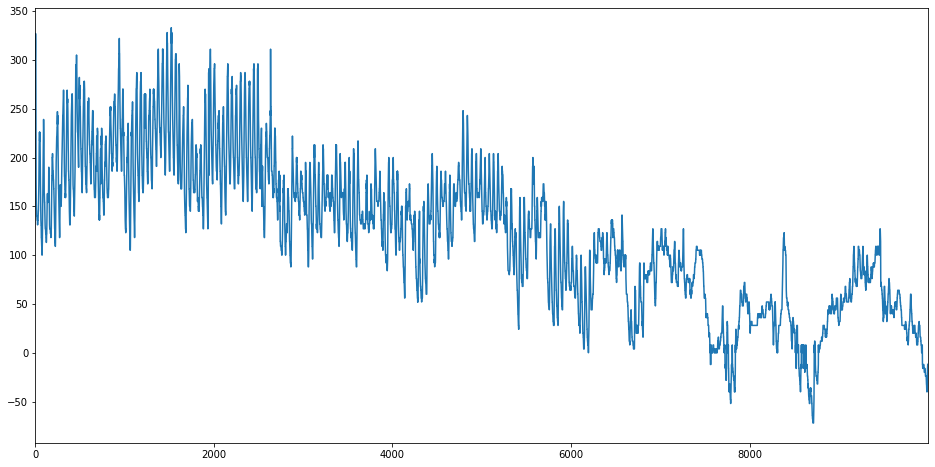

In [56]:
df.temp_dc[:10000].plot();
# Or you can do plt.plot(df.temp_dc[:10000])

You can easily create new columns:

In [57]:
df['temp']            = df['temp_dc'] / 10.0
df['dewpoint']        = df['dewpoint_dc'] / 10.0
df['mean_wind_kts']   = df['mean_wind_speed_dk'] / 10.0
df['max_wind_kts']    = df['max_wind_dk'] / 10.0
df['sunshine_hours']  = df['sunshine_ch'] / 100.0
df['rainfall_mm']     = df['rainfall_um'] / 1000.0
df.tail()

,timestamp,temp_dc,humidity,dewpoint_dc,pressure_mbar,mean_wind_speed_dk,ave_wind_bearing,sunshine_ch,rainfall_um,max_wind_dk,temp,dewpoint,mean_wind_kts,max_wind_kts,sunshine_hours,rainfall_mm
422955,2019-12-05 00:00:00,-32.0,100.0,-32.0,1020.0,5.0,135.0,0,0,40.0,-3.2,-3.2,0.5,4.0,0.0,0.0
422956,2019-12-05 00:30:00,-28.0,96.0,-33.0,1020.0,18.0,180.0,0,0,60.0,-2.8,-3.3,1.8,6.0,0.0,0.0
422957,2019-12-05 01:00:00,-12.0,100.0,-12.0,1020.0,18.0,180.0,0,0,60.0,-1.2,-1.2,1.8,6.0,0.0,0.0
422958,2019-12-05 01:30:00,-8.0,100.0,-8.0,1020.0,35.0,180.0,0,0,80.0,-0.8,-0.8,3.5,8.0,0.0,0.0
422959,2019-12-05 02:00:00,-8.0,94.0,-16.0,1020.0,8.0,225.0,0,0,60.0,-0.8,-1.6,0.8,6.0,0.0,0.0


For us, the time is more useful as an index:

In [59]:
df.set_index('timestamp', inplace=True)
df

,temp_dc,humidity,dewpoint_dc,pressure_mbar,mean_wind_speed_dk,ave_wind_bearing,sunshine_ch,rainfall_um,max_wind_dk,temp,dewpoint,mean_wind_kts,max_wind_kts,sunshine_hours,rainfall_mm
timestamp,,,,,,,,,,,,,,,
1995-06-30 15:00:00,295.0,43.0,156.0,1013.0,14.0,225.0,1044,0,14.0,29.5,15.6,1.4,1.4,10.44,0.0
1995-06-30 15:30:00,305.0,36.0,140.0,1013.0,13.0,315.0,50,0,13.0,30.5,14.0,1.3,1.3,0.50,0.0
1995-06-30 16:00:00,311.0,41.0,163.0,1013.0,12.0,315.0,51,0,12.0,31.1,16.3,1.2,1.2,0.51,0.0
1995-06-30 16:30:00,322.0,43.0,181.0,1013.0,2.0,315.0,50,0,2.0,32.2,18.1,0.2,0.2,0.50,0.0
1995-06-30 17:00:00,327.0,41.0,178.0,1013.0,8.0,225.0,51,0,8.0,32.7,17.8,0.8,0.8,0.51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-05 00:00:00,-32.0,100.0,-32.0,1020.0,5.0,135.0,0,0,40.0,-3.2,-3.2,0.5,4.0,0.00,0.0
2019-12-05 00:30:00,-28.0,96.0,-33.0,1020.0,18.0,180.0,0,0,60.0,-2.8,-3.3,1.8,6.0,0.00,0.0
2019-12-05 01:00:00,-12.0,100.0,-12.0,1020.0,18.0,180.0,0,0,60.0,-1.2,-1.2,1.8,6.0,0.00,0.0


In [60]:
df.index

DatetimeIndex(['1995-06-30 15:00:00', '1995-06-30 15:30:00',
               '1995-06-30 16:00:00', '1995-06-30 16:30:00',
               '1995-06-30 17:00:00', '1995-06-30 17:30:00',
               '1995-06-30 18:00:00', '1995-06-30 18:30:00',
               '1995-06-30 19:00:00', '1995-06-30 19:30:00',
               ...
               '2019-12-04 21:30:00', '2019-12-04 22:00:00',
               '2019-12-04 22:30:00', '2019-12-04 23:00:00',
               '2019-12-04 23:30:00', '2019-12-05 00:00:00',
               '2019-12-05 00:30:00', '2019-12-05 01:00:00',
               '2019-12-05 01:30:00', '2019-12-05 02:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=422960, freq=None)

Note 'inplace'. Some methods have names like 'set_index' but don't change the original by default.

In [61]:
df['humidity']['2018-11-08 21:30:00']

85.0

In [62]:
df['humidity'][datetime(year=2018, month=11, day=8, hour=21, minute=30, second=0)]

85.0

We can also request the row, and then ask for its humidity component.  If we aren't asking for it by its integer position, we use `loc()` instead of `iloc()`.

In [63]:
df.loc['2018-11-08 21:30:00']['humidity']

85.0

Let's plot the values in a column.

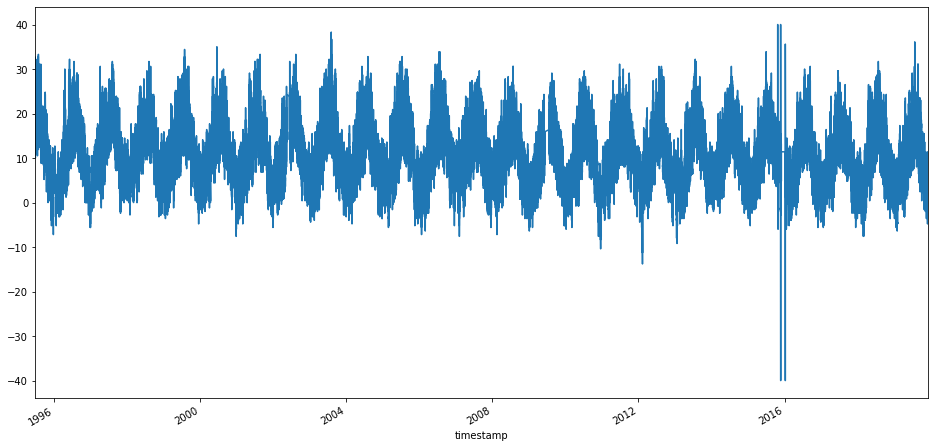

In [64]:
df.temp.plot();

Looks as if there are some dodgy readings there.  Let's zoom in:

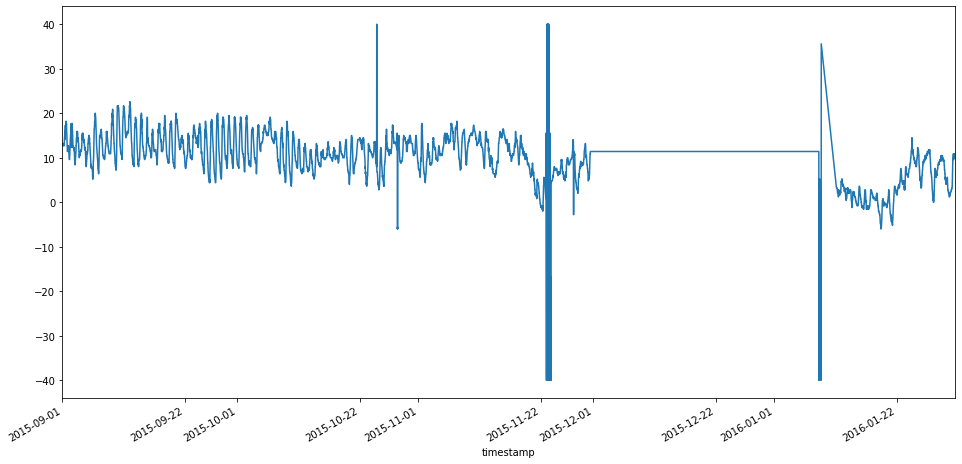

In [65]:
df['2015-09-01':'2016-01-31']["temp"].plot();

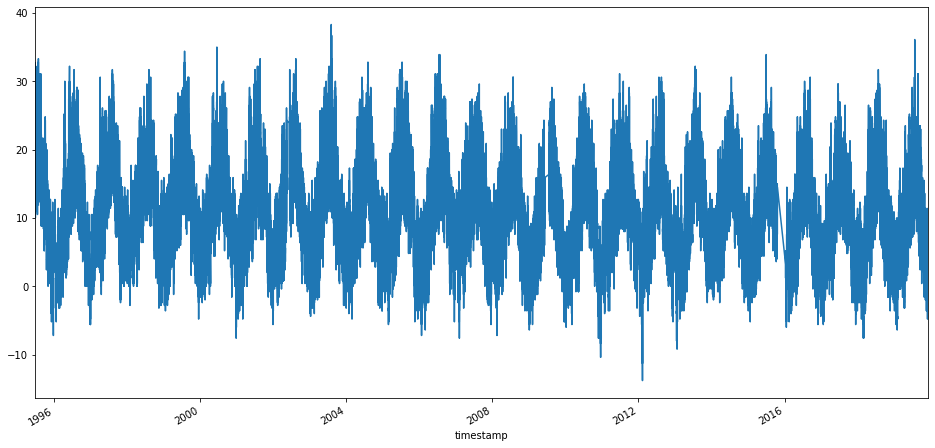

In [66]:
dodgy_rows =  df['2015-10-22':'2016-01-10'].index

df = df.drop(dodgy_rows)
df["temp"].plot();

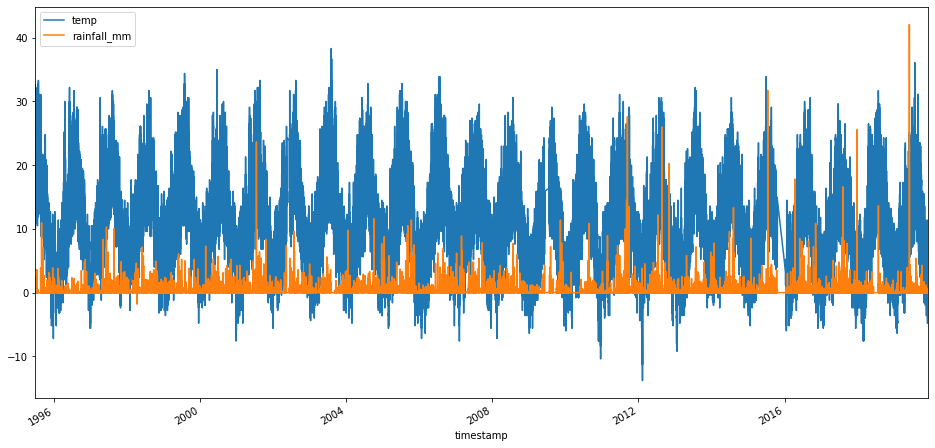

In [67]:
df[["temp", "rainfall_mm"]].plot();

In [68]:
print(df.temp.max(), df.temp.idxmax())
print(df.temp.min(), df.temp.idxmin())

38.3 2003-08-06 15:30:00
-13.8 2012-02-11 07:00:00


In [69]:
print(df['temp'].quantile(0.99))
print(df['temp'].quantile(0.01))

26.5
-2.4


In [70]:
df.temp.idxmin() - df.temp.idxmax()

Timedelta('3110 days 15:30:00')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 419315 entries, 1995-06-30 15:00:00 to 2019-12-05 02:00:00
Data columns (total 15 columns):
temp_dc               419265 non-null float64
humidity              418645 non-null float64
dewpoint_dc           418694 non-null float64
pressure_mbar         418968 non-null float64
mean_wind_speed_dk    418619 non-null float64
ave_wind_bearing      400927 non-null float64
sunshine_ch           419315 non-null int64
rainfall_um           419315 non-null int64
max_wind_dk           418619 non-null float64
temp                  419265 non-null float64
dewpoint              418694 non-null float64
mean_wind_kts         418619 non-null float64
max_wind_kts          418619 non-null float64
sunshine_hours        419315 non-null float64
rainfall_mm           419315 non-null float64
dtypes: float64(13), int64(2)
memory usage: 51.2 MB


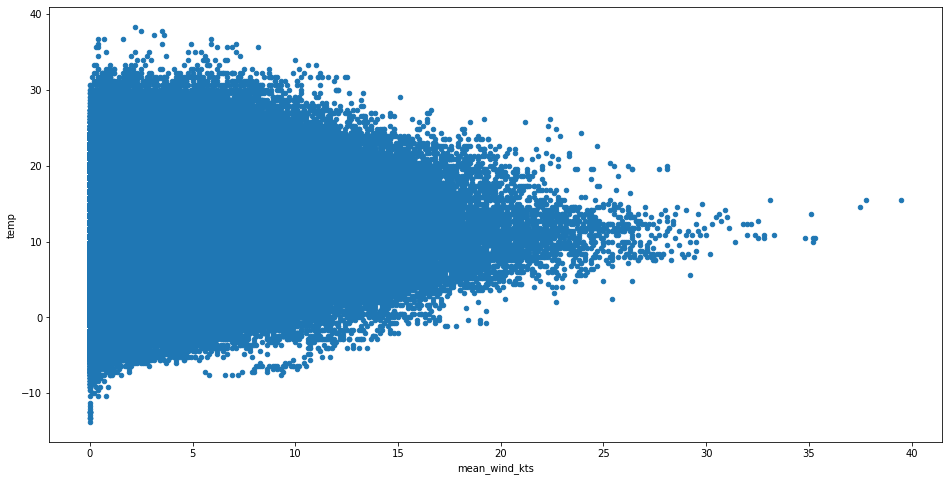

In [74]:
df.plot(kind='scatter', x='mean_wind_kts', y='temp');

We can do some other interesting things with a time-based index:

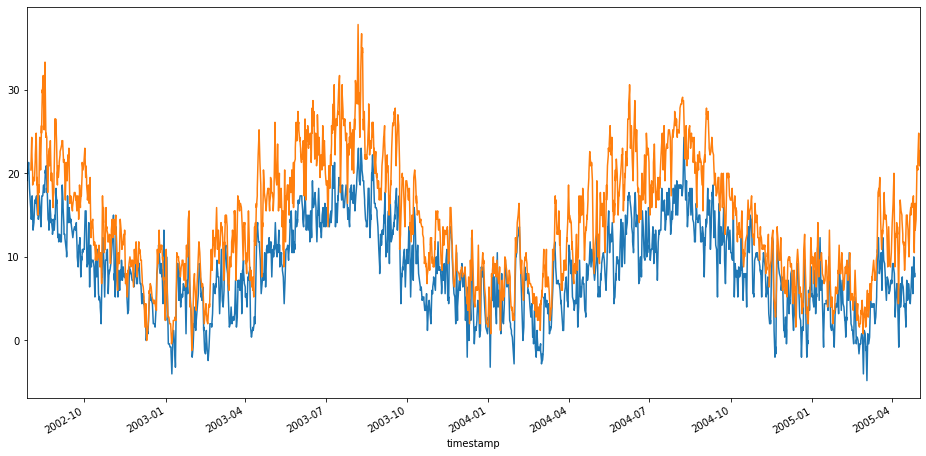

In [75]:
df['temp'][df.index.hour == 0][5000:7000].plot()
df['temp'][df.index.hour == 14][5000:7000].plot();

# GroupBy

In [76]:
df.index.month

Int64Index([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='timestamp', length=419315)

In [77]:
monthgrouper = df.groupby(df.index.month)
monthgrouper

Not very helpful - what's happening behind the scenes?

In [78]:
monthgrouper.groups

{1: DatetimeIndex(['1996-01-01 00:00:00', '1996-01-01 00:30:00',
                '1996-01-01 01:00:00', '1996-01-01 01:30:00',
                '1996-01-01 02:00:00', '1996-01-01 02:30:00',
                '1996-01-01 03:00:00', '1996-01-01 03:30:00',
                '1996-01-01 04:00:00', '1996-01-01 04:30:00',
                ...
                '2019-01-31 19:00:00', '2019-01-31 19:30:00',
                '2019-01-31 20:00:00', '2019-01-31 20:30:00',
                '2019-01-31 21:00:00', '2019-01-31 21:30:00',
                '2019-01-31 22:00:00', '2019-01-31 22:30:00',
                '2019-01-31 23:00:00', '2019-01-31 23:30:00'],
               dtype='datetime64[ns]', name='timestamp', length=35241, freq=None),
 2: DatetimeIndex(['1996-02-01 00:00:00', '1996-02-01 00:30:00',
                '1996-02-01 01:00:00', '1996-02-01 01:30:00',
                '1996-02-01 02:00:00', '1996-02-01 02:30:00',
                '1996-02-01 03:00:00', '1996-02-01 03:30:00',
                '1996-

In [79]:
july_frame = df.loc[monthgrouper.groups[7]]
july_frame.mean()

temp_dc                181.987564
humidity                72.018508
dewpoint_dc            123.735509
pressure_mbar         1015.408445
mean_wind_speed_dk      35.374283
ave_wind_bearing       197.980627
sunshine_ch             10.952196
rainfall_um             30.288373
max_wind_dk            101.879367
temp                    18.198756
dewpoint                12.373551
mean_wind_kts            3.537428
max_wind_kts            10.187937
sunshine_hours           0.109522
rainfall_mm              0.030288
dtype: float64

Maybe plot the first 10000...

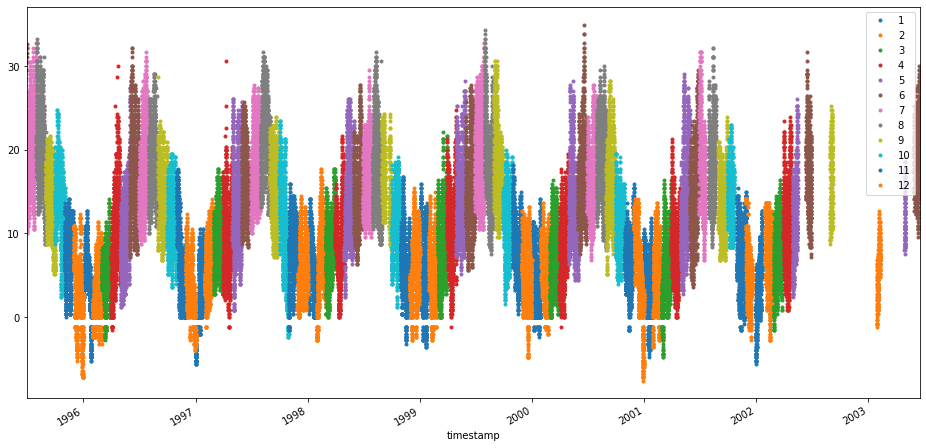

In [80]:
for month, groupframe in monthgrouper:
    groupframe['temp'][:10000].plot(style='.', label=month)
plt.legend();

You can call some methods directly on the groupby object:

In [81]:
monthgrouper.mean()

,temp_dc,humidity,dewpoint_dc,pressure_mbar,mean_wind_speed_dk,ave_wind_bearing,sunshine_ch,rainfall_um,max_wind_dk,temp,dewpoint,mean_wind_kts,max_wind_kts,sunshine_hours,rainfall_mm
timestamp,,,,,,,,,,,,,,,
1,43.938679,86.795329,22.610320,1013.994630,50.576206,189.452997,3.969723,26.016543,130.584190,4.393868,2.261032,5.057621,13.058419,0.039697,0.026017
2,47.393121,83.552605,20.041196,1014.343502,50.296701,193.181255,5.798830,27.053080,133.042972,4.739312,2.004120,5.029670,13.304297,0.057988,0.027053
3,66.262726,78.490317,28.293842,1014.587599,45.173394,184.309377,7.086432,21.863535,122.706271,6.626273,2.829384,4.517339,12.270627,0.070864,0.021864
4,92.785273,74.203869,43.949321,1013.542680,39.241907,183.395328,11.115334,23.890124,111.726936,9.278527,4.394932,3.924191,11.172694,0.111153,0.023890
5,126.175787,73.702084,74.687127,1015.256804,40.137922,181.372237,11.965003,33.586644,114.110648,12.617579,7.468713,4.013792,11.411065,0.119650,0.033587
6,159.034130,72.649685,103.828539,1016.342765,37.675984,190.889520,11.581706,36.133026,109.156829,15.903413,10.382854,3.767598,10.915683,0.115817,0.036133
7,181.987564,72.018508,123.735509,1015.408445,35.374283,197.980627,10.952196,30.288373,101.879367,18.198756,12.373551,3.537428,10.187937,0.109522,0.030288
8,178.355070,73.940334,125.147719,1015.279930,36.601882,198.471255,9.971146,37.904967,102.578610,17.835507,12.514772,3.660188,10.257861,0.099711,0.037905
9,149.817883,77.424310,106.144695,1016.475286,37.166926,192.023342,8.947913,45.655906,102.479898,14.981788,10.614469,3.716693,10.247990,0.089479,0.045656


month: 1


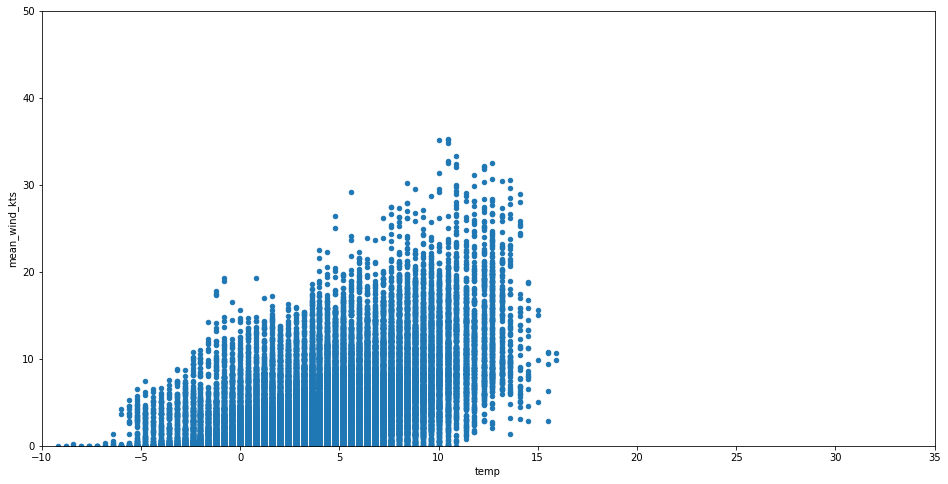

month: 2


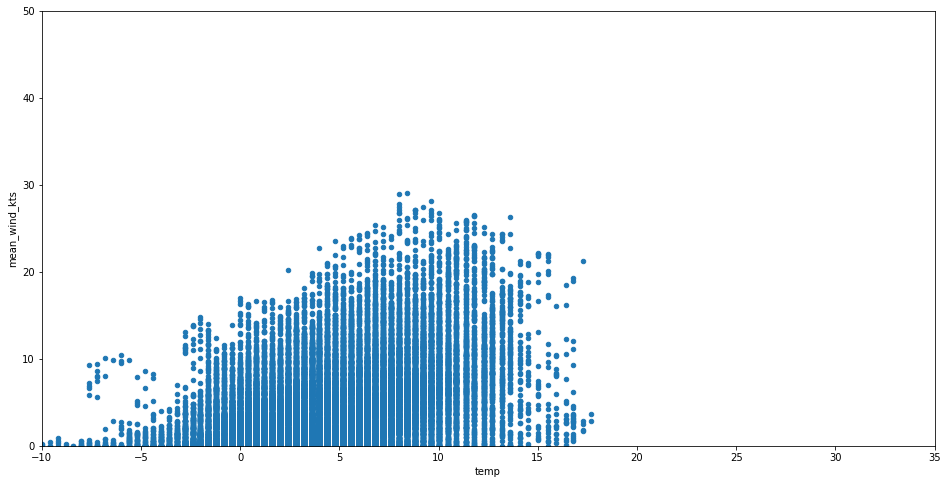

month: 3


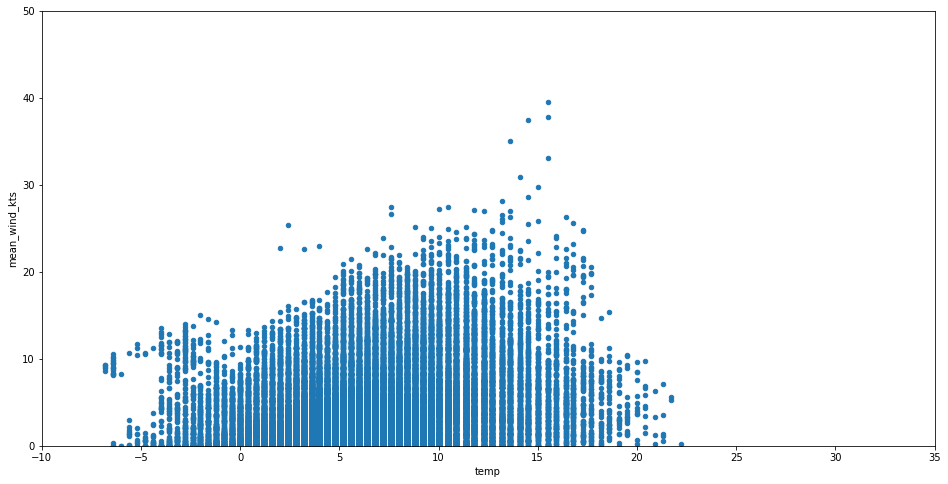

month: 4


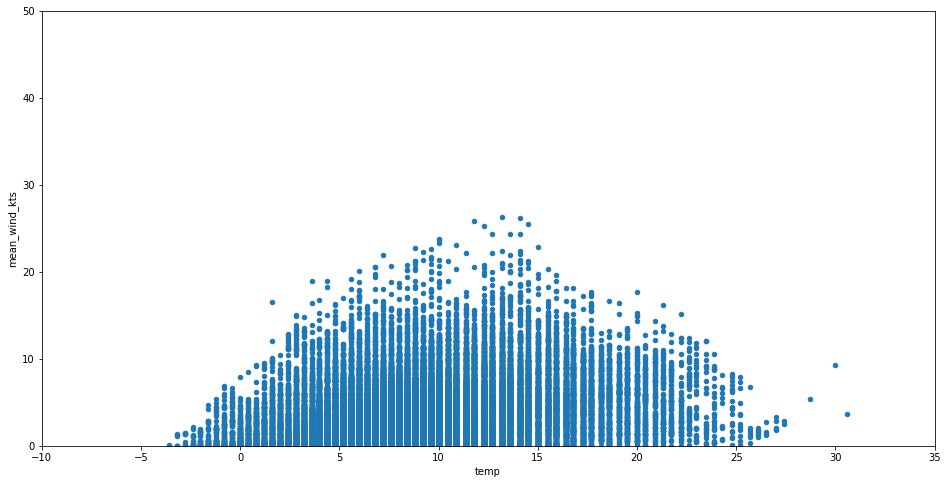

month: 5


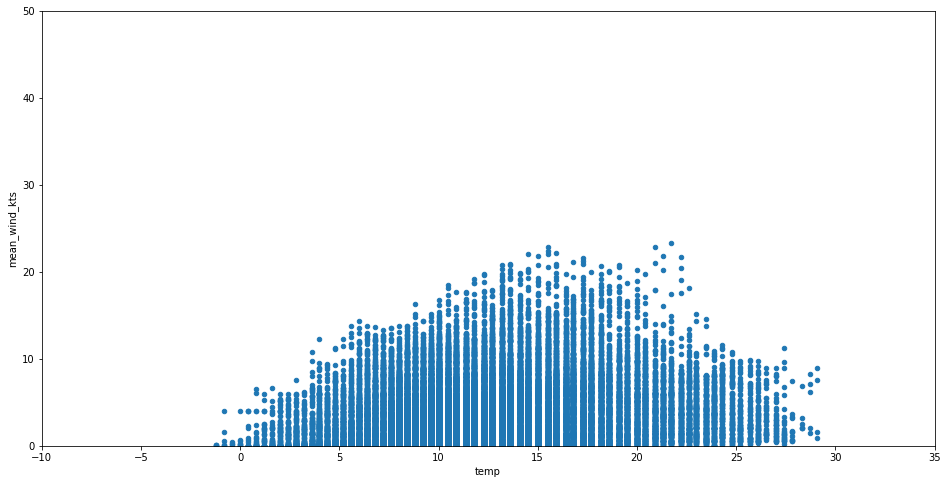

month: 6


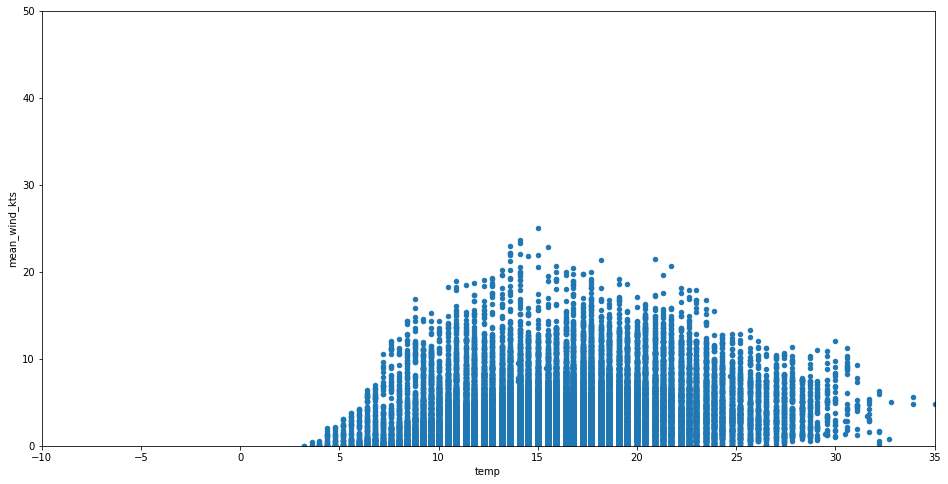

month: 7


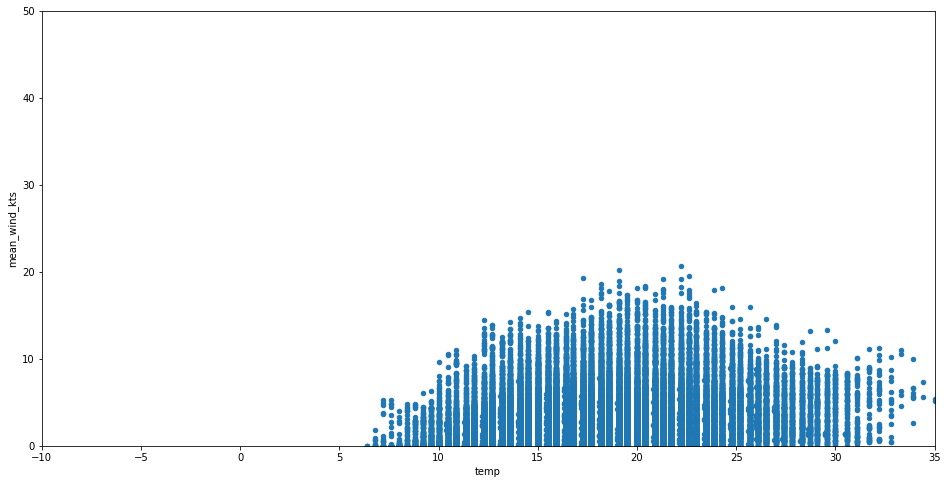

month: 8


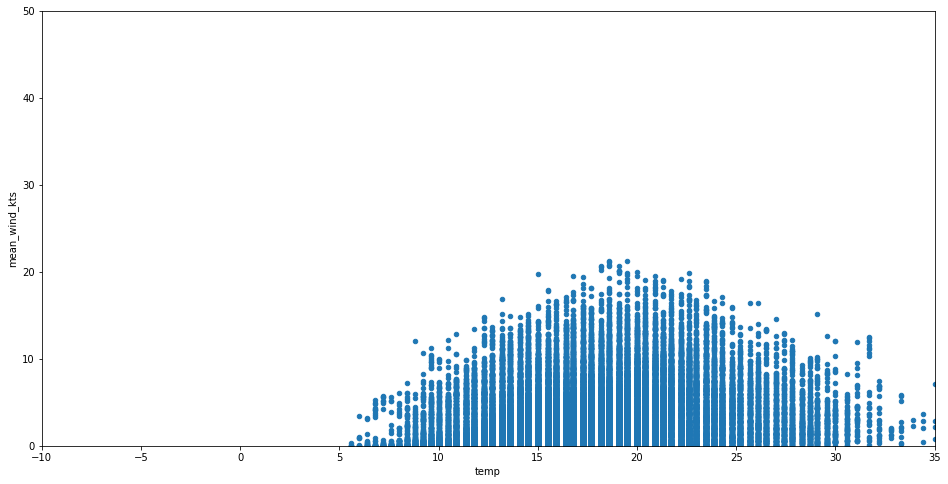

month: 9


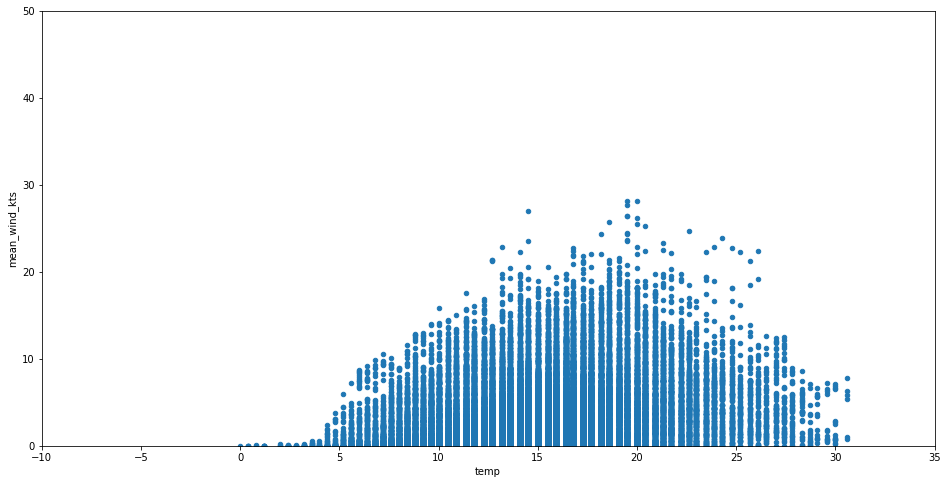

month: 10


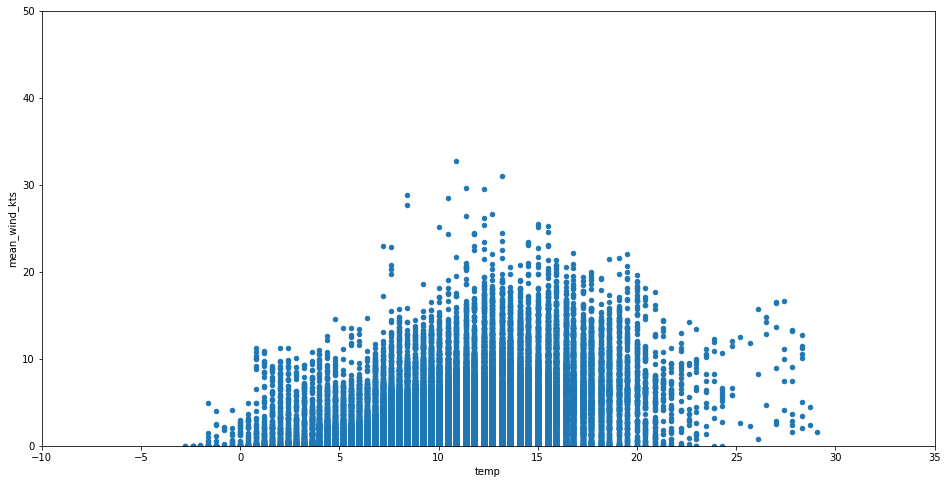

month: 11


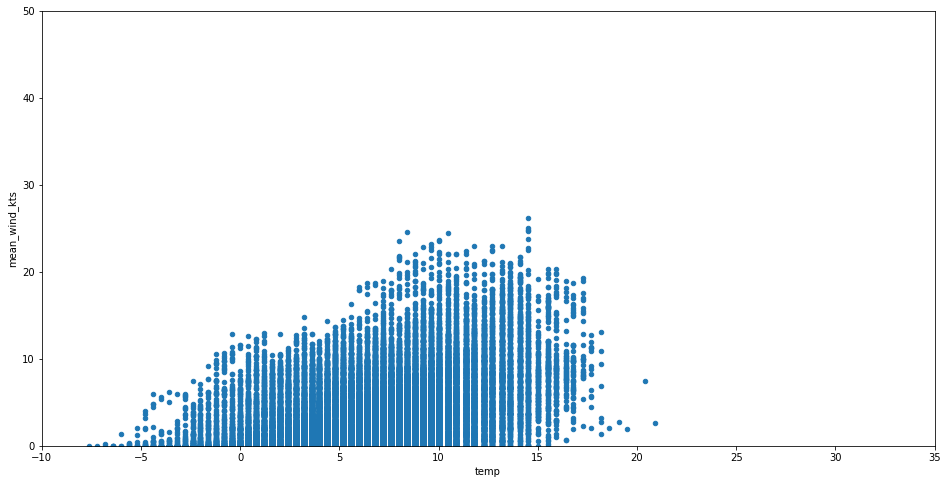

month: 12


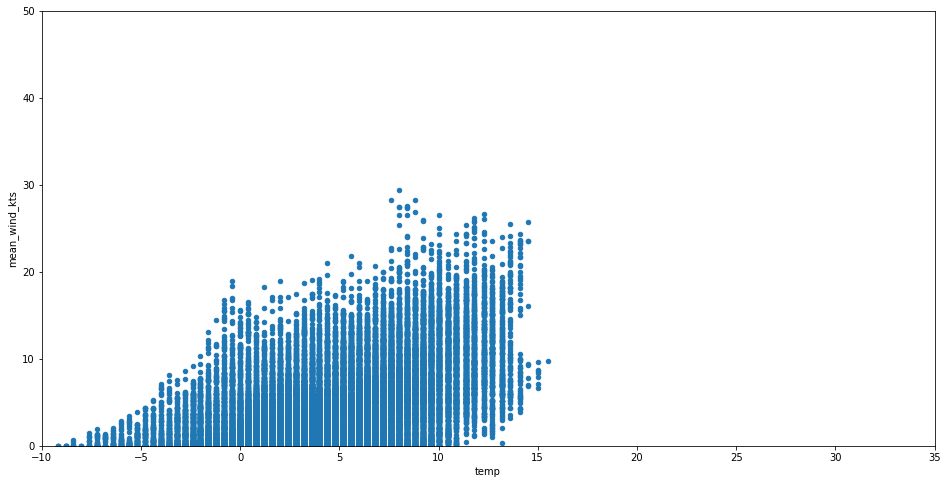

In [82]:
for month, groupframe in monthgrouper:
    print("month:",month)
    groupframe.plot(x='temp', y='mean_wind_kts', kind='scatter', xlim=[-10,35], ylim=[0, 50])
    plt.show()

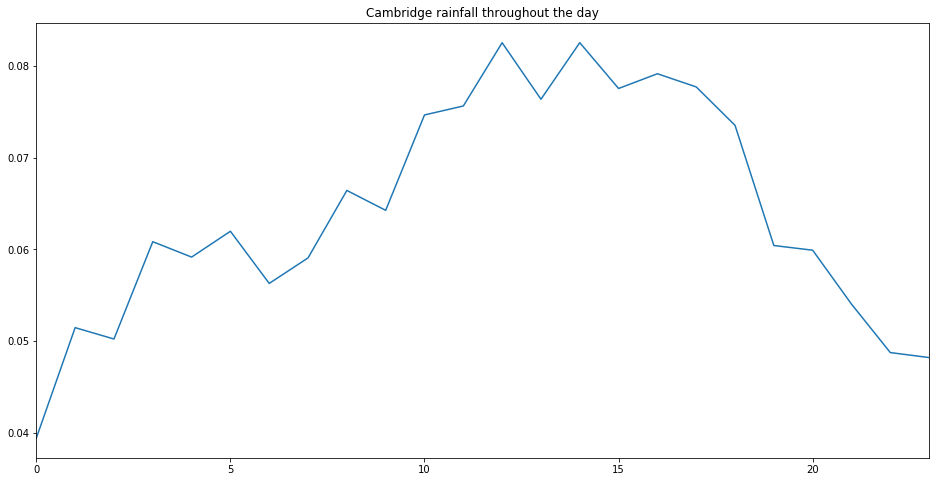

In [83]:
hourgrouper = df.groupby(df.index.hour)
rains = { hour: frame["rainfall_mm"].mean() * 2 for hour, frame in hourgrouper }
s = pd.Series(rains)
s.plot(title="Cambridge rainfall throughout the day");

So Pandas is good for:

* reading data
* cleaning data
* merging data
* exploring data
* understanding data

and especially valuable as a first stage before using data for anything else.

---


# That's all for now!

These notebooks are available at [http://github.com/quentinsf/labnotebook](http://github.com/quentinsf/labnotebook).

I suggest you Google for '[A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)'